<a href="https://colab.research.google.com/github/smlra-kjsce/Pytorch-101-2023/blob/main/Tensor_Operations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tensor Operations
This section covers:
* Indexing and slicing
* Reshaping tensors (tensor views)
* Shifting tensors between CPU and GPU
* Tensor arithmetic and basic operations
* Dot products
* Matrix multiplication
* Element-wise multiplication
* Broadcasting

## Perform standard imports

In [1]:
import torch
import numpy as np

## Indexing and slicing
Extracting specific values from a tensor works just the same as with NumPy arrays<br><br>

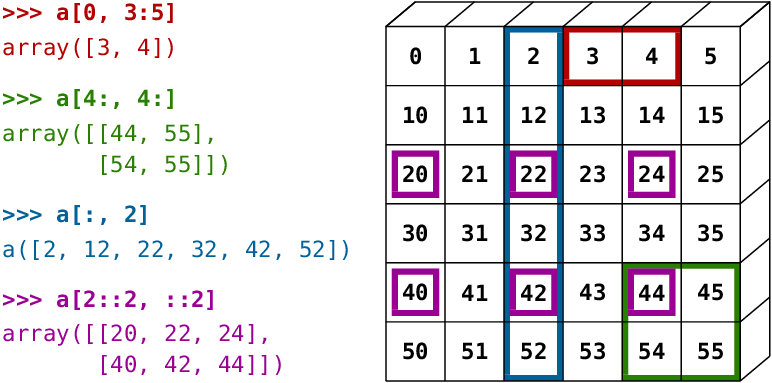



In [2]:
x = torch.arange(20).reshape(5,4)
print(x)

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15],
        [16, 17, 18, 19]])


In [3]:
print(x[0][1])
print(x[2][1])

tensor(1)
tensor(9)


In [4]:
# Grabbing the right hand column values
x[1:4,1:] # x[start:end:step, start:end:step]

tensor([[ 5,  6,  7],
        [ 9, 10, 11],
        [13, 14, 15]])

## Reshape tensors
<a href='https://pytorch.org/docs/master/tensors.html#torch.Tensor.view'><strong><tt>view()</tt></strong></a> and <a href='https://pytorch.org/docs/master/torch.html#torch.reshape'><strong><tt>reshape()</tt></strong></a> do essentially the same thing by returning a reshaped tensor without changing the original tensor in place.<br>
There's a good discussion of the differences <a href='https://stackoverflow.com/questions/49643225/whats-the-difference-between-reshape-and-view-in-pytorch'>here</a>.

Also learn about <a href='https://pytorch.org/docs/stable/generated/torch.squeeze.html'><strong><tt>squeeze()</tt></strong></a> and <a href='https://pytorch.org/docs/stable/generated/torch.unsqueeze.html'><strong><tt>unsqueeze()</tt></strong></a> 

In [5]:
x = torch.arange(10)
print(x)

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])


In [6]:
x.view(2,5)

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])

In [7]:
x.view(5,2)

tensor([[0, 1],
        [2, 3],
        [4, 5],
        [6, 7],
        [8, 9]])

In [8]:
# x is unchanged
x

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### Views reflect the most current data

In [9]:
z = x.view(2,5)
x[0]=1
print(z)

tensor([[1, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])


In [10]:
z = x.view(2,5).clone()
x[0]=1
print(z)

tensor([[1, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])


### Views can infer the correct size
By passing in <tt>-1</tt> PyTorch will infer the correct value from the given tensor, when you are aware of fixing all dimensions except one while reshaping.

In [11]:
y = torch.Tensor([[1,2,3,4,5,6,7,8,9,10], [11,12,13,14,15,16,17,18,19,20]])
print(y.shape)
y = y.view(2,2,-1)
print(y)
print(y.shape)

torch.Size([2, 10])
tensor([[[ 1.,  2.,  3.,  4.,  5.],
         [ 6.,  7.,  8.,  9., 10.]],

        [[11., 12., 13., 14., 15.],
         [16., 17., 18., 19., 20.]]])
torch.Size([2, 2, 5])


In [12]:
y.view(4,-1)

tensor([[ 1.,  2.,  3.,  4.,  5.],
        [ 6.,  7.,  8.,  9., 10.],
        [11., 12., 13., 14., 15.],
        [16., 17., 18., 19., 20.]])

In [13]:
y.view(-1,5)

tensor([[ 1.,  2.,  3.,  4.,  5.],
        [ 6.,  7.,  8.,  9., 10.],
        [11., 12., 13., 14., 15.],
        [16., 17., 18., 19., 20.]])

### Adopt another tensor's shape with <tt>.view_as()</tt>
<a href='https://pytorch.org/docs/master/tensors.html#torch.Tensor.view_as'><strong><tt>view_as(input)</tt></strong></a> only works with tensors that have the same number of elements.

In [14]:
x1 = torch.rand(5,4)
x2 = torch.rand(2,10)
print(x1)
print()
print(x2)

tensor([[0.0117, 0.7000, 0.3742, 0.9361],
        [0.1188, 0.3239, 0.6452, 0.5105],
        [0.8339, 0.6292, 0.7103, 0.5491],
        [0.4954, 0.4763, 0.9559, 0.3393],
        [0.2325, 0.7498, 0.7296, 0.1382]])

tensor([[0.8693, 0.1949, 0.9626, 0.0965, 0.1385, 0.7827, 0.6018, 0.6016, 0.0083,
         0.6733],
        [0.9647, 0.6824, 0.9955, 0.1162, 0.0558, 0.9848, 0.0596, 0.5633, 0.9978,
         0.9781]])


In [15]:
x2 = x2.view_as(x1)

In [16]:
x2 #= x2.reshape(x1.shape)
# unchanged

tensor([[0.8693, 0.1949, 0.9626, 0.0965],
        [0.1385, 0.7827, 0.6018, 0.6016],
        [0.0083, 0.6733, 0.9647, 0.6824],
        [0.9955, 0.1162, 0.0558, 0.9848],
        [0.0596, 0.5633, 0.9978, 0.9781]])

### squeeze() and unsqueeze()

In [17]:
y = torch.Tensor([[1,2,3,4,5,6,7,8,9,10], [11,12,13,14,15,16,17,18,19,20]])
print("Original size: ", y.shape)
y_row = torch.unsqueeze(y,0) # unsqueeze about row as axis=0
print("Unsqueezed size:", y_row.shape) 
print(y_row)
y_col = torch.unsqueeze(y,1) # unsqueeze about col as axis=1
print(y_col.shape)
print(y_col)
y_axis2 = torch.unsqueeze(y,2) # unsqueeze about axis=2
print(y_axis2.shape)
print(y_axis2)

Original size:  torch.Size([2, 10])
Unsqueezed size: torch.Size([1, 2, 10])
tensor([[[ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
         [11., 12., 13., 14., 15., 16., 17., 18., 19., 20.]]])
torch.Size([2, 1, 10])
tensor([[[ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]],

        [[11., 12., 13., 14., 15., 16., 17., 18., 19., 20.]]])
torch.Size([2, 10, 1])
tensor([[[ 1.],
         [ 2.],
         [ 3.],
         [ 4.],
         [ 5.],
         [ 6.],
         [ 7.],
         [ 8.],
         [ 9.],
         [10.]],

        [[11.],
         [12.],
         [13.],
         [14.],
         [15.],
         [16.],
         [17.],
         [18.],
         [19.],
         [20.]]])


In [18]:
y = torch.Tensor([4])
print("Original size: ", y.shape)
print(y)
y_row = torch.unsqueeze(y,0) #added another dimension across row
print(y_row.shape)
print(y_row)
y_col= torch.unsqueeze(y,1) #added another dimension across column
print(y_col.shape)
print(y_col)
y_restored = torch.squeeze(y_row,0) #added another dimension across row
print(y_restored.shape)
print(y_restored)

Original size:  torch.Size([1])
tensor([4.])
torch.Size([1, 1])
tensor([[4.]])
torch.Size([1, 1])
tensor([[4.]])
torch.Size([1])
tensor([4.])


In [19]:
y = torch.zeros(2, 1, 2, 1, 2)
print(y.shape)
y_sq = torch.squeeze(y)
print(y_sq)
print(y_sq.shape)
print(torch.squeeze(y,0).shape) # won't change as axis=0 is not equal to 1
print(torch.squeeze(y,1).shape)

torch.Size([2, 1, 2, 1, 2])
tensor([[[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]]])
torch.Size([2, 2, 2])
torch.Size([2, 1, 2, 1, 2])
torch.Size([2, 2, 1, 2])


## Shifting tensors between CPU and GPU

In [20]:
# Tensor loading into GPU, back to CPU, detach(), etc.
# Check device (first) = cuda, if i want to perform a non-gpu task then first i have to bring the tensors from gpu memory to cpu one.
# if gradient is attached to tensor in cpu or gpu, so call detach (if cpu) and detach().cpu() (if gpu)

In [21]:
t = torch.Tensor([1,2,3])

In [22]:
t.type()

'torch.FloatTensor'

In [23]:
# To check where a particular tensor is located
t.device

device(type='cpu')

In [24]:
dev = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(dev)

cuda


In [25]:
# For now, let's assume dev = 'gpu', you can shift tensors or models from gpu to cpu or vice versa using tensor_name.to(dev) / model.to(dev)
t.to(dev)

tensor([1., 2., 3.], device='cuda:0')

In [26]:
t.type()

'torch.FloatTensor'

In [27]:
# You can also use tensor_name.cpu()
t.cpu()

tensor([1., 2., 3.])

## Tensor Arithmetic
Adding tensors can be performed a few different ways depending on the desired result.<br>

As a simple expression:

In [28]:
a = torch.tensor([1,2,3], dtype=torch.float32)
b = torch.tensor([4,5,6], dtype=torch.float32)
print(a + b)

tensor([5., 7., 9.])


As arguments passed into a torch operation:

In [29]:
print(torch.add(a, b))
print(a)

tensor([5., 7., 9.])
tensor([1., 2., 3.])


Changing a tensor in-place

In [30]:
a.add_(b)  # equivalent to a=torch.add(a,b)
print(a)

tensor([5., 7., 9.])


<div class="alert alert-info"><strong>NOTE:</strong> Any operation that changes a tensor in-place is post-fixed with an underscore _.
    <br>In the above example: <tt>a.add_(b)</tt> changed <tt>a</tt>.</div>

### Basic Tensor Operations
<table style="display: inline-block">
<caption style="text-align: center"><strong>Arithmetic</strong></caption>
<tr><th>OPERATION</th><th>FUNCTION</th><th>DESCRIPTION</th></tr>
<tr><td>a + b</td><td>a.add(b)</td><td>element wise addition</td></tr>
<tr><td>a - b</td><td>a.sub(b)</td><td>subtraction</td></tr>
<tr><td>a * b</td><td>a.mul(b)</td><td>multiplication</td></tr>
<tr><td>a / b</td><td>a.div(b)</td><td>division</td></tr>
<tr><td>a % b</td><td>a.fmod(b)</td><td>modulo (remainder after division)</td></tr>
<tr><td>a<sup>b</sup></td><td>a.pow(b)</td><td>power</td></tr>
<tr><td>&nbsp;</td><td></td><td></td></tr>
</table>

<table style="display: inline-block">
<caption style="text-align: center"><strong>Monomial Operations</strong></caption>
<tr><th>OPERATION</th><th>FUNCTION</th><th>DESCRIPTION</th></tr>
<tr><td>|a|</td><td>torch.abs(a)</td><td>absolute value</td></tr>
<tr><td>1/a</td><td>torch.reciprocal(a)</td><td>reciprocal</td></tr>
<tr><td>$\sqrt{a}$</td><td>torch.sqrt(a)</td><td>square root</td></tr>
<tr><td>log(a)</td><td>torch.log(a)</td><td>natural log</td></tr>
<tr><td>e<sup>a</sup></td><td>torch.exp(a)</td><td>exponential</td></tr>
<tr><td>12.34  ==>  12.</td><td>torch.trunc(a)</td><td>truncated integer</td></tr>
<tr><td>12.34  ==>  0.34</td><td>torch.frac(a)</td><td>fractional component</td></tr>
</table>

<table style="display: inline-block">
<caption style="text-align: center"><strong>Summary Statistics</strong></caption>
<tr><th>OPERATION</th><th>FUNCTION</th><th>DESCRIPTION</th></tr>
<tr><td>$\sum a$</td><td>torch.sum(a)</td><td>sum</td></tr>
<tr><td>$\bar a$</td><td>torch.mean(a)</td><td>mean</td></tr>
<tr><td>a<sub>max</sub></td><td>torch.max(a)</td><td>maximum</td></tr>
<tr><td>a<sub>min</sub></td><td>torch.min(a)</td><td>minimum</td></tr>
<tr><td colspan="3">torch.max(a,b) returns a tensor of size a<br>containing the element wise max between a and b</td></tr>
</table>

<div class="alert alert-info"><strong>NOTE:</strong> Most arithmetic operations require float values. Those that do work with integers return integer tensors.<br>
For example, <tt>torch.div(a,b)</tt> performs floor division (truncates the decimal) for integer types, and classic division for floats.</div>

## Dot products
A <a href='https://en.wikipedia.org/wiki/Dot_product'>dot product</a> is the sum of the products of the corresponding entries of two 1D tensors. If the tensors are both vectors, the dot product is given as:<br>

$\begin{bmatrix} a & b & c \end{bmatrix} \;\cdot\; \begin{bmatrix} d & e & f \end{bmatrix} = ad + be + cf$

If the tensors include a column vector, then the dot product is the sum of the result of the multiplied matrices. For example:<br>
$\begin{bmatrix} a & b & c \end{bmatrix} \;\cdot\; \begin{bmatrix} d \\ e \\ f \end{bmatrix} = ad + be + cf$<br><br>
Dot products can be expressed as <a href='https://pytorch.org/docs/stable/torch.html#torch.dot'><strong><tt>torch.dot(a,b)</tt></strong></a> or `a.dot(b)` or `b.dot(a)`

In [31]:
a = torch.tensor([1,2,3], dtype=torch.float)
b = torch.tensor([4,5,6], dtype=torch.float)
print(a.mul(b)) # for reference
print()
print(a.dot(b))

tensor([ 4., 10., 18.])

tensor(32.)


<div class="alert alert-info"><strong>NOTE:</strong> There's a slight difference between <tt>torch.dot()</tt> and <tt>numpy.dot()</tt>. While <tt>torch.dot()</tt> only accepts 1D arguments and returns a dot product, <tt>numpy.dot()</tt> also accepts 2D arguments and performs matrix multiplication. We show matrix multiplication below.</div>

## Matrix multiplication
2D <a href='https://en.wikipedia.org/wiki/Matrix_multiplication'>Matrix multiplication</a> is possible when the number of columns in tensor <strong><tt>A</tt></strong> matches the number of rows in tensor <strong><tt>B</tt></strong>. In this case, the product of tensor <strong><tt>A</tt></strong> with size $(x,y)$ and tensor <strong><tt>B</tt></strong> with size $(y,z)$ results in a tensor of size $(x,z)$

<br>

$\begin{bmatrix} a & b & c \\
d & e & f \end{bmatrix} \;\times\; \begin{bmatrix} m & n \\ p & q \\ r & s \end{bmatrix} = \begin{bmatrix} (am+bp+cr) & (an+bq+cs) \\
(dm+ep+fr) & (dn+eq+fs) \end{bmatrix}$

<br>

Matrix multiplication can be computed using <a href='https://pytorch.org/docs/stable/torch.html#torch.mm'><strong><tt>torch.mm(a,b)</tt></strong></a> or `a.mm(b)` or `a @ b`

In [32]:
a = torch.tensor([[0,2,4],[1,3,5]], dtype=torch.float)
b = torch.tensor([[6,7],[8,9],[10,11]], dtype=torch.float)

print('a: ',a.size())
print('b: ',b.size())
print('a x b: ',torch.mm(a,b).size())

a:  torch.Size([2, 3])
b:  torch.Size([3, 2])
a x b:  torch.Size([2, 2])


In [33]:
print(torch.mm(a,b))

tensor([[56., 62.],
        [80., 89.]])


In [34]:
print(a.mm(b))

tensor([[56., 62.],
        [80., 89.]])


In [35]:
print(a @ b)

tensor([[56., 62.],
        [80., 89.]])


## Element-Wise Multiplication

In [36]:
#TODO: Show usage of mul() operator. A.mul(B) or torch.mul(A,B)
a = torch.tensor([[1,2,4],[1,3,5]])
b = torch.tensor([[6,8,9],[2,10,11]])

In [37]:
a.mul(b) # Use mul_ to store the output matrix in 'a' itself

tensor([[ 6, 16, 36],
        [ 2, 30, 55]])

In [38]:
b.mul(a)

tensor([[ 6, 16, 36],
        [ 2, 30, 55]])

In [39]:
torch.mul(a,b)

tensor([[ 6, 16, 36],
        [ 2, 30, 55]])

In [40]:
a 
# unchanged

tensor([[1, 2, 4],
        [1, 3, 5]])

## Broadcasting

Two tensors are “broadcastable” if the following rules hold:

* Each tensor has at least one dimension.

* When iterating over the dimension sizes, starting at the trailing dimension (last dimension in the list), the dimension sizes must either be equal, one of them is 1, or one of them does not exist.

In [41]:
t1 = torch.randn(3, 4)
t2 = torch.randn(1, 4)

print(t1,t2,sep='\n\n')

tensor([[-1.8285,  1.5425, -1.4791,  0.9434],
        [-0.0147,  0.2155,  1.1475, -0.5443],
        [ 0.4971,  1.1518,  0.7871, -0.9881]])

tensor([[-0.7777,  1.5015, -1.3785, -0.2593]])


In [42]:
# Notice how the two tensors dont have the same dimensions but we can still perform arithmetic operations. Why?
t1 + t2

tensor([[-2.6062,  3.0440, -2.8576,  0.6841],
        [-0.7924,  1.7170, -0.2310, -0.8036],
        [-0.2805,  2.6533, -0.5914, -1.2473]])

In [43]:
t1 - t2

tensor([[-1.0508,  0.0410, -0.1006,  1.2027],
        [ 0.7630, -1.2860,  2.5260, -0.2850],
        [ 1.2748, -0.3497,  2.1656, -0.7288]])

In [44]:
t1 = torch.randn(3, 1, 4, 1)
t2 = torch.randn(   3, 4, 1)

print(t1,t2,sep='\n\n')

tensor([[[[-0.6851],
          [-0.3240],
          [-0.7711],
          [ 0.1193]]],


        [[[-2.2631],
          [ 0.2476],
          [-0.0523],
          [-0.0991]]],


        [[[ 0.4461],
          [ 1.4291],
          [-0.7044],
          [ 0.9454]]]])

tensor([[[ 0.0805],
         [-1.0933],
         [-1.1993],
         [-0.9187]],

        [[-0.4285],
         [-1.4204],
         [-0.1731],
         [-0.2208]],

        [[ 0.4331],
         [ 1.1109],
         [ 0.9169],
         [ 0.3299]]])


In [45]:
(t1 + t2).size()

torch.Size([3, 3, 4, 1])

## Great work!